# Visualize Likert scale responses

## Load data

In [1]:
# Load Tekko survey data
import pandas as pd

path = '../data/tekko_responses.csv'
responses = pd.read_csv(path)
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 46 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                        --------------  -----  
 0   Response ID                                                                                                                                                                                                                   175 non-null    object 
 1   concrete experience                                                                                                                      

## Select data, plots for discrimination

### Overall

In [36]:
# Select and format data
discrimination_cols = [col for col in responses.columns if 'How often do you see the following appear in multiplayer matches?' in col]
discrimination_responses = responses[discrimination_cols].copy().dropna()
discrimination_responses.info()
discrimination_responses.head()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 23 to 174
Data columns (total 6 columns):
 #   Column                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                       --------------  ----- 
 0   How often do you see the following appear in multiplayer matches? - Ableism (anti-disability) rhetoric       152 non-null    object
 1   How often do you see the following appear in multiplayer matches? - Anti-LGBTQ+ slurs                        152 non-null    object
 2   How often do you see the following appear in multiplayer matches? - Anti-Jewish slurs                        152 non-null    object
 3   How often do you see the following appear in multiplayer matches? - Anti-Muslim slurs                        152 non-null    object
 4   How often do you see the following appear in multiplayer matches? - Gende

,How often do you see the following appear in multiplayer matches? - Ableism (anti-disability) rhetoric,How often do you see the following appear in multiplayer matches? - Anti-LGBTQ+ slurs,How often do you see the following appear in multiplayer matches? - Anti-Jewish slurs,How often do you see the following appear in multiplayer matches? - Anti-Muslim slurs,How often do you see the following appear in multiplayer matches? - Gender-based discrimination or misogyny,How often do you see the following appear in multiplayer matches? - Racial Harrassment
23,Fewer than every 10 games 1,4,3,3,3,3
24,Fewer than every 10 games 1,Fewer than every 10 games 1,Fewer than every 10 games 1,Fewer than every 10 games 1,Fewer than every 10 games 1,Fewer than every 10 games 1
25,2,4,Fewer than every 10 games 1,Fewer than every 10 games 1,4,3
26,Fewer than every 10 games 1,2,2,2,2,3
27,2,4,2,Fewer than every 10 games 1,4,Almost every game5


In [38]:
discrimination_responses.columns = ['ableism', 'anti_lgbtq', 'anti_jewish', 'anti_muslim', 'gender_misogyny', 'racism']
# discrimination_responses = discrimination_responses.replace('Fewer than every 10 games 1', 1).replace('Almost every game5', 5).astype(str)
discrimination_responses = discrimination_responses.replace('Fewer than every 10 games 1', '1 (Fewer than every 10 games)').replace('Almost every game5', '5 (Almost every game)').astype(str)
discrimination_responses.head()

,ableism,anti_lgbtq,anti_jewish,anti_muslim,gender_misogyny,racism
23,1 (Fewer than every 10 games),4,3,3,3,3
24,1 (Fewer than every 10 games),1 (Fewer than every 10 games),1 (Fewer than every 10 games),1 (Fewer than every 10 games),1 (Fewer than every 10 games),1 (Fewer than every 10 games)
25,2,4,1 (Fewer than every 10 games),1 (Fewer than every 10 games),4,3
26,1 (Fewer than every 10 games),2,2,2,2,3
27,2,4,2,1 (Fewer than every 10 games),4,5 (Almost every game)


In [40]:
# Reorder based on future plots, change labels
cols_reordered = ['gender_misogyny', 'anti_lgbtq', 'racism', 'ableism', 'anti_jewish', 'anti_muslim']
cols_rename = {
    'gender_misogyny': 'Gender-based/misogyny',
    'anti_lgbtq': 'Anti-LGBTQ+',
    'racism': 'Racism',
    'ableism': 'Ableism',
    'anti_jewish': 'Antisemitic',
    'anti_muslim': 'Islamophobic',
}
discrimination_responses = discrimination_responses[cols_reordered].rename(columns=cols_rename)

#### Create Likert plots (overall)

In [41]:
import plot_likert

# colorscheme = plot_likert.colors.likert5
colorscheme = plot_likert.colors.default

reversed_likert5 = [colorscheme[0]] + list(reversed(colorscheme[1:6]))
reversed_likert5[3] = '#999999'
reversed_likert5

['#ffffff00',
 'darkblue',
 'cornflowerblue',
 '#999999',
 'lightcoral',
 'firebrick']

/mnt/c/Users/mamille3/research/gaming_voice_chat/conda_env/lib/python3.12/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/mnt/c/Users/mamille3/research/gaming_voice_chat/conda_env/lib/python3.12/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


<Axes: title={'center': 'Frequency of seeing discrimination in gaming (n=152)'}, xlabel='Percentage of Responses'>

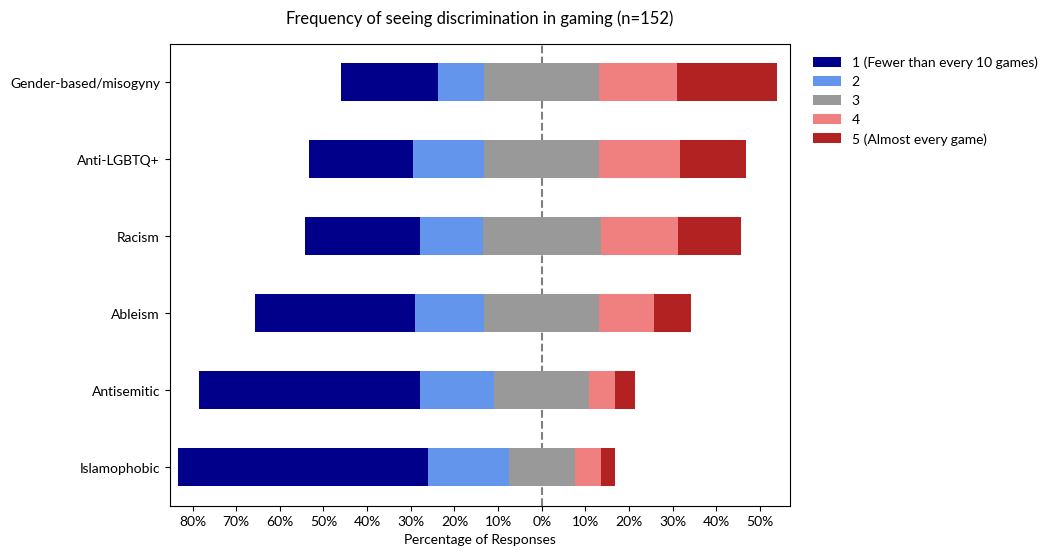

In [151]:
import plot_likert
import matplotlib.pyplot as plt

font = {'family': ['Lato']}
plt.rc('font', **font)
scale = sorted(discrimination_responses['Gender-based/misogyny'].unique())
# plot = plot_likert.plot_likert(discrimination_responses, scale, colors=reversed_likert5, bar_labels=True, bar_labels_color='white', width=.5, figsize=(8,6))
plot = plot_likert.plot_likert(discrimination_responses, scale, colors=reversed_likert5, plot_percentage=True, width=.5, figsize=(8,6))
plot.legend(loc='upper right', bbox_to_anchor=(1.42, 1), frameon=False)
plot.set_title("Frequency of seeing discrimination in gaming (n=152)", pad=15)
plot

### Misogyny (responses from marginalized groups)

In [59]:
# For gender-based discrimination
female_responses = responses[responses['What is your gender? - Selected Choice'].isin(['Female'])]
nonbinary_responses = responses[responses['What is your gender? - Selected Choice'].isin(['Non-binary / third gender', 'Prefer to self-describe'])]
male_responses = responses[responses['What is your gender? - Selected Choice'].isin(['Male'])]
print(len(female_responses))
print(len(nonbinary_responses))
print(len(male_responses))

63
17
68


In [149]:
misogyny_colname = 'How often do you see the following appear in multiplayer matches? - Gender-based discrimination or misogyny'
misogyny_responses = pd.concat([nonbinary_responses[misogyny_colname], female_responses[misogyny_colname], male_responses[misogyny_colname]], axis=1)
# misogyny_responses = pd.concat([female_responses[misogyny_colname], male_responses[misogyny_colname], nonbinary_responses[misogyny_colname]], axis=1)
# misogyny_responses.columns = ['Female', 'Non-binary', 'Male']
# misogyny_responses.columns = ['Female', 'Male', 'Non-binary']
misogyny_responses.columns = ['Non-binary', 'Female', 'Male']
misogyny_responses = misogyny_responses.replace('Fewer than every 10 games 1', '1 (Fewer than every 10 games)').replace('Almost every game5', '5 (Almost every game)')
misogyny_responses

,Non-binary,Female,Male
24,1 (Fewer than every 10 games),NaN,NaN
33,3,NaN,NaN
37,5 (Almost every game),NaN,NaN
53,5 (Almost every game),NaN,NaN
57,3,NaN,NaN
...,...,...,...
165,NaN,NaN,5 (Almost every game)
168,NaN,NaN,3
171,NaN,NaN,3
173,NaN,NaN,3


#### Create Likert plots

In [65]:
import plot_likert

# colorscheme = plot_likert.colors.likert5
colorscheme = plot_likert.colors.default

reversed_likert5 = [colorscheme[0]] + list(reversed(colorscheme[1:6]))
reversed_likert5[3] = '#999999'
reversed_likert5

['#ffffff00',
 'darkblue',
 'cornflowerblue',
 '#999999',
 'lightcoral',
 'firebrick']

/mnt/c/Users/mamille3/research/gaming_voice_chat/conda_env/lib/python3.12/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/mnt/c/Users/mamille3/research/gaming_voice_chat/conda_env/lib/python3.12/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]
/mnt/c/Users/mamille3/research/gaming_voice_chat/conda_env/lib/python3.12/site-packages/plot_likert/plot_likert.py:313: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number o

<Axes: title={'center': 'Frequency of seeing gender-based discrimination or misogyny in gaming'}, xlabel='Percentage of Responses'>

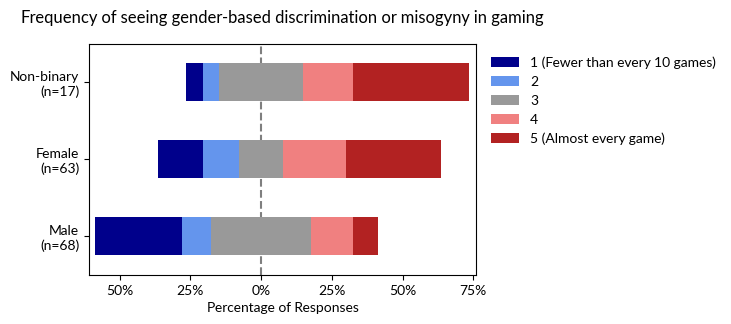

In [150]:
import plot_likert
import matplotlib.pyplot as plt

font = {'family': ['Lato']}
plt.rc('font', **font)
scale = sorted(misogyny_responses['Female'].dropna().unique())
# plot = plot_likert.plot_likert(misogyny_responses, scale, colors=reversed_likert5, plot_percentage=True, bar_labels=True, bar_labels_color='white', width=0.5, figsize=(5,3))
plot = plot_likert.plot_likert(misogyny_responses, scale, colors=reversed_likert5, plot_percentage=True, width=0.5, figsize=(5,3))
plot.legend(loc='upper right', bbox_to_anchor=(1.65, 1), frameon=False)
plot.set_title("Frequency of seeing gender-based discrimination or misogyny in gaming", pad=15)
# plot.set_yticklabels(reversed(['Female\n(n=63)', 'Male\n(n=68)', 'Non-binary\n(n=17)']))
plot.set_yticklabels(['Male\n(n=68)', 'Female\n(n=63)', 'Non-binary\n(n=17)'])
plot

### Racism (responses from marginalized groups)

In [110]:
race_values = responses['How do you describe your race or ethnic identity? (select all that apply) - Selected Choice'].value_counts()
race_values

How do you describe your race or ethnic identity? (select all that apply) - Selected Choice
White or Caucasian                                                               110
Asian                                                                             10
Black or African American                                                          8
Prefer not to say                                                                  7
Hispanic and/or Latino/Latina/Latinx                                               6
Asian,White or Caucasian                                                           4
White or Caucasian,Hispanic and/or Latino/Latina/Latinx                            2
Black or African American,White or Caucasian                                       1
Prefer to self-describe                                                            1
American Indian or Alaska Native                                                   1
Black or African American,Prefer to self-describe         

In [109]:
responses['How do you describe your race or ethnic identity? (select all that apply) - Prefer to self-describe - Text'].value_counts()

How do you describe your race or ethnic identity? (select all that apply) - Prefer to self-describe - Text
American                   1
Black and part Italian     1
Name: count, dtype: int64

In [121]:
# For gender-based discrimination
# white_responses = responses[responses['How do you describe your race or ethnic identity? (select all that apply) - Selected Choice'].isin(['White or Caucasian'])]
white_responses = responses[responses['How do you describe your race or ethnic identity? (select all that apply) - Selected Choice'].str.contains('White').fillna(False)]
print(len(white_responses))
black_responses = responses[responses['How do you describe your race or ethnic identity? (select all that apply) - Selected Choice'].str.contains('Black').fillna(False)]
print(len(black_responses))
asian_responses = responses[responses['How do you describe your race or ethnic identity? (select all that apply) - Selected Choice'].str.contains('Asian').fillna(False)]
print(len(asian_responses))

118
11
14


/tmp/ipykernel_138/4275815192.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  white_responses = responses[responses['How do you describe your race or ethnic identity? (select all that apply) - Selected Choice'].str.contains('White').fillna(False)]
/tmp/ipykernel_138/4275815192.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  black_responses = responses[responses['How do you describe your race or ethnic identity? (select all that apply) - Selected Choice'].str.contains('Black').fillna(False)]
/tmp/ipykernel_138/4275815192.py:7: FutureWarning: Downc

In [125]:
racism_colname = 'How often do you see the following appear in multiplayer matches? - Racial Harrassment'
racism_responses = pd.concat([black_responses[racism_colname], asian_responses[racism_colname], white_responses[racism_colname]], axis=1)
racism_responses.columns = ['Black', 'Asian', 'White']
racism_responses = racism_responses.replace('Fewer than every 10 games 1', '1 (Fewer than every 10 games)').replace('Almost every game5', '5 (Almost every game)')
racism_responses

,Black,Asian,White
27,5 (Almost every game),NaN,NaN
35,5 (Almost every game),NaN,5 (Almost every game)
91,5 (Almost every game),NaN,NaN
100,1 (Fewer than every 10 games),NaN,NaN
110,1 (Fewer than every 10 games),NaN,NaN
...,...,...,...
167,NaN,NaN,2
168,NaN,NaN,3
169,NaN,NaN,1 (Fewer than every 10 games)
172,NaN,NaN,3


#### Create Likert plots

In [126]:
import plot_likert

# colorscheme = plot_likert.colors.likert5
colorscheme = plot_likert.colors.default

reversed_likert5 = [colorscheme[0]] + list(reversed(colorscheme[1:6]))
reversed_likert5[3] = '#999999'
reversed_likert5

['#ffffff00',
 'darkblue',
 'cornflowerblue',
 '#999999',
 'lightcoral',
 'firebrick']

/mnt/c/Users/mamille3/research/gaming_voice_chat/conda_env/lib/python3.12/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/mnt/c/Users/mamille3/research/gaming_voice_chat/conda_env/lib/python3.12/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]
/mnt/c/Users/mamille3/research/gaming_voice_chat/conda_env/lib/python3.12/site-packages/plot_likert/plot_likert.py:313: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number o

<Axes: title={'center': 'Frequency of seeing racial harassment in gaming'}, xlabel='Percentage of Responses'>

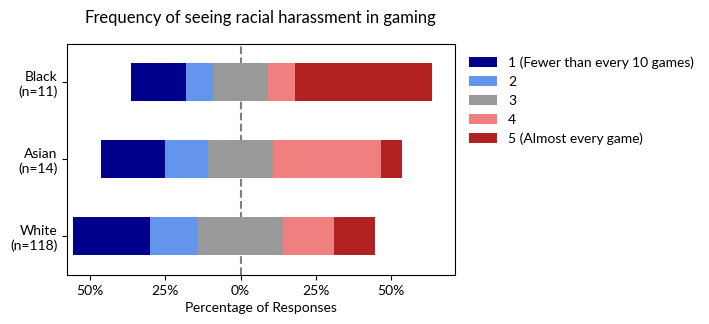

In [143]:
import plot_likert
import matplotlib.pyplot as plt

font = {'family': ['Lato']}
plt.rc('font', **font)
scale = sorted(racism_responses['White'].dropna().unique())
plot = plot_likert.plot_likert(racism_responses, scale, colors=reversed_likert5, plot_percentage=True, width=0.5, figsize=(5,3))
plot.legend(loc='upper right', bbox_to_anchor=(1.65, 1), frameon=False)
plot.set_title("Frequency of seeing racial harassment in gaming", pad=15)
plot.set_yticklabels(reversed(['Black\n(n=11)', 'Asian\n(n=14)', 'White\n(n=118)']))
plot

## Select data, plots for privacy

In [7]:
# Select and format data
privacy_cols = [col for col in responses.columns if 'How comfortable do you feel about voice chats being recorded and saved for the following:' in col]
privacy_responses = responses[privacy_cols].copy().dropna()
privacy_responses.info()
privacy_responses.head()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 23 to 174
Data columns (total 3 columns):
 #   Column                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                            --------------  -----  
 0   How comfortable do you feel about voice chats being recorded and saved for the following: - Data Analytics                        152 non-null    float64
 1   How comfortable do you feel about voice chats being recorded and saved for the following: - Reporting cheating                    152 non-null    object 
 2   How comfortable do you feel about voice chats being recorded and saved for the following: - Reporting toxicity or discrimination  152 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


,How comfortable do you feel about voice chats being recorded and saved for the following: - Data Analytics,How comfortable do you feel about voice chats being recorded and saved for the following: - Reporting cheating,How comfortable do you feel about voice chats being recorded and saved for the following: - Reporting toxicity or discrimination
23,2.0,Extremely Comfortable5,3
24,1.0,Extremely Comfortable5,Extremely Comfortable5
25,5.0,Extremely Comfortable5,Extremely Comfortable5
26,4.0,Extremely Comfortable5,Extremely Comfortable5
27,1.0,4,3


In [8]:
privacy_responses.columns = ['Data analytics', 'Reporting cheating', 'Reporting toxicity or discrimination']
for col in privacy_responses.columns:
    print(col)
    print(privacy_responses[col].unique())
    print()

Data analytics
[2. 1. 5. 4. 3.]

Reporting cheating
['Extremely Comfortable5' '4' 'Extremely Uncomfortable1' '2' '3']

Reporting toxicity or discrimination
['3' 'Extremely Comfortable5' '4' '2' 'Extremely Uncomfortable1']



In [10]:
values_transform = {
    'Extremely Uncomfortable1': '1 (Extremely uncomfortable)',
    'Extremely Comfortable5': '5 (Extremely comfortable)',
    '1': '1 (Extremely uncomfortable)',
    '5': '5 (Extremely comfortable)',
}
privacy_responses['Data analytics'] = privacy_responses['Data analytics'].astype(int).astype(str)
privacy_responses = privacy_responses.replace(values_transform)
privacy_responses.head()

,Data analytics,Reporting cheating,Reporting toxicity or discrimination
23,2,5 (Extremely comfortable),3
24,1 (Extremely uncomfortable),5 (Extremely comfortable),5 (Extremely comfortable)
25,5 (Extremely comfortable),5 (Extremely comfortable),5 (Extremely comfortable)
26,4,5 (Extremely comfortable),5 (Extremely comfortable)
27,1 (Extremely uncomfortable),4,3


In [11]:
# Reorder based on future plots, change labels
cols_reordered = ['Reporting toxicity or discrimination', 'Reporting cheating', 'Data analytics']
privacy_responses = privacy_responses[cols_reordered]

### Create Likert plots

In [26]:
import plot_likert

# colorscheme = plot_likert.colors.likert5
colorscheme = plot_likert.colors.default
likert5 = colorscheme
likert5[3] = '#999999'
likert5

['#ffffff00',
 'firebrick',
 'lightcoral',
 '#999999',
 'cornflowerblue',
 'darkblue']

In [13]:
# Find out which fonts are available

import matplotlib.font_manager
flist = matplotlib.font_manager.findSystemFonts()
names = set([matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist])
print(names)

{'DejaVu Serif', 'Lato', 'DejaVu Sans Mono', 'DejaVu Sans'}


/mnt/c/Users/mamille3/research/gaming_voice_chat/conda_env/lib/python3.12/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


<Axes: title={'center': 'Comfort with voice chat being recorded for different purposes'}, xlabel='Number of Responses'>

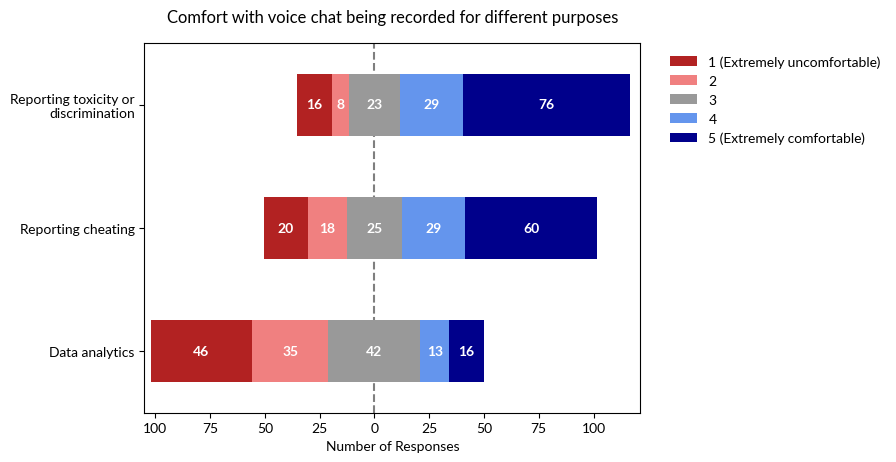

In [27]:
import plot_likert
import matplotlib.pyplot as plt

font = {'family': ['Lato']}
plt.rc('font', **font)
scale = sorted(privacy_responses['Reporting toxicity or discrimination'].unique())
plot = plot_likert.plot_likert(privacy_responses, scale, colors=likert5, bar_labels=True, bar_labels_color='white')
plot.legend(loc='upper right', bbox_to_anchor=(1.51, 1), frameon=False)
plot.set_title("Comfort with voice chat being recorded for different purposes", pad=15)
plot